# Telecom Churn Analysis and Prediction using Machine Learning Models

In [2]:
# Task 1: Understanding the Problem Statement - This analysis aims to understand and predict the telecom customer 
# churn rate, because the cost of acquiring a new customer is significantly more than the cost of retaining an existing customer.
#Research indicates the new customer acquisition cost for a leading telecom company can be up to 5x more than the cost
# to retain an existing customer (source: <https://towardsdatascience.com/customer-churn-in-telecom-segment-5e49356f39e5>).

In [3]:
# Task 2: Import Dataset, Libraries, and Perform Exploratory Data Analysis
import numpy as np      # Multi-dimensional array object
import pandas as pd     # Data Manipulation
import matplotlib.pyplot as plt   # Data Visualisation
import seaborn as sns             # Data Visualisation
import plotly.express as px      # Interactive - Data Visualisation

# Test to see if the below codes affect output runs, at the end.
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot # Offline versions of the plots
import cufflinks as cf # Works as a connector between the pandas library and plotly
cf.go_offline()
init_notebook_mode(connected = True) # To connect Jupyter notebook with Javascript
from jupyterthemes import jtplot # Jupyter theme
jtplot.style(theme = 'monokai', context = 'notebook', ticks=True, grid=False)

In [4]:
telecom_df = pd.read_csv('/Users/trishonabisram/Downloads/telecom_churn.csv')

In [5]:
#...Exploratory Data Analysis, shape of data
telecom_df.shape

(5000, 21)

In [6]:
# Display the top 5 instances
telecom_df.head()

,state,account_length,area_code,phone_number,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,class
0,16,128,415,2845,0,1,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,35,107,415,2301,0,1,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,31,137,415,1616,0,0,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,35,84,408,2510,1,0,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,36,75,415,155,1,0,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [7]:
# Load the bottom 5 instances
telecom_df.tail()

,state,account_length,area_code,phone_number,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,class
4995,11,50,408,2000,0,1,40,235.7,127,40.07,...,126,18.96,297.5,116,13.39,9.9,5,2.67,2,0
4996,49,152,415,394,0,0,0,184.2,90,31.31,...,73,21.83,213.6,113,9.61,14.7,2,3.97,3,1
4997,7,61,415,313,0,0,0,140.6,89,23.90,...,128,14.69,212.4,97,9.56,13.6,4,3.67,1,0
4998,7,109,510,3471,0,0,0,188.8,67,32.10,...,92,14.59,224.4,89,10.10,8.5,6,2.30,0,0
4999,46,86,415,2412,0,1,34,129.4,102,22.00,...,104,22.70,154.8,100,6.97,9.3,16,2.51,0,0


In [8]:
# Display stats for df
telecom_df.describe()

,state,account_length,area_code,phone_number,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,class
count,5000.00000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,...,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,25.99840,100.25860,436.911400,2499.500000,0.094600,0.264600,7.755200,180.288900,100.029400,30.649668,...,100.191000,17.054322,200.391620,99.919200,9.017732,10.261780,4.435200,2.771196,1.570400,0.141400
std,14.80348,39.69456,42.209182,1443.520003,0.292691,0.441164,13.546393,53.894699,19.831197,9.162069,...,19.826496,4.296843,50.527789,19.958686,2.273763,2.761396,2.456788,0.745514,1.306363,0.348469
min,0.00000,1.00000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,13.00000,73.00000,408.000000,1249.750000,0.000000,0.000000,0.000000,143.700000,87.000000,24.430000,...,87.000000,14.140000,166.900000,87.000000,7.510000,8.500000,3.000000,2.300000,1.000000,0.000000
50%,26.00000,100.00000,415.000000,2499.500000,0.000000,0.000000,0.000000,180.100000,100.000000,30.620000,...,100.000000,17.090000,200.400000,100.000000,9.020000,10.300000,4.000000,2.780000,1.000000,0.000000
75%,39.00000,127.00000,415.000000,3749.250000,0.000000,1.000000,17.000000,216.200000,113.000000,36.750000,...,114.000000,19.900000,234.700000,113.000000,10.560000,12.000000,6.000000,3.240000,2.000000,0.000000
max,50.00000,243.00000,510.000000,4999.000000,1.000000,1.000000,52.000000,351.500000,165.000000,59.760000,...,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000,1.000000


In [9]:
#Display column features
telecom_df.columns

Index(['state', 'account_length', 'area_code', 'phone_number',
       'international_plan', 'voice_mail_plan', 'number_vmail_messages',
       'total_day_minutes', 'total_day_calls', 'total_day_charge',
       'total_eve_minutes', 'total_eve_calls', 'total_eve_charge',
       'total_night_minutes', 'total_night_calls', 'total_night_charge',
       'total_intl_minutes', 'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls', 'class'],
      dtype='object')

In [10]:
# Display summary info on df
telecom_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          5000 non-null   int64  
 1   account_length                 5000 non-null   int64  
 2   area_code                      5000 non-null   int64  
 3   phone_number                   5000 non-null   int64  
 4   international_plan             5000 non-null   int64  
 5   voice_mail_plan                5000 non-null   int64  
 6   number_vmail_messages          5000 non-null   int64  
 7   total_day_minutes              5000 non-null   float64
 8   total_day_calls                5000 non-null   int64  
 9   total_day_charge               5000 non-null   float64
 10  total_eve_minutes              5000 non-null   float64
 11  total_eve_calls                5000 non-null   int64  
 12  total_eve_charge               5000 non-null   f

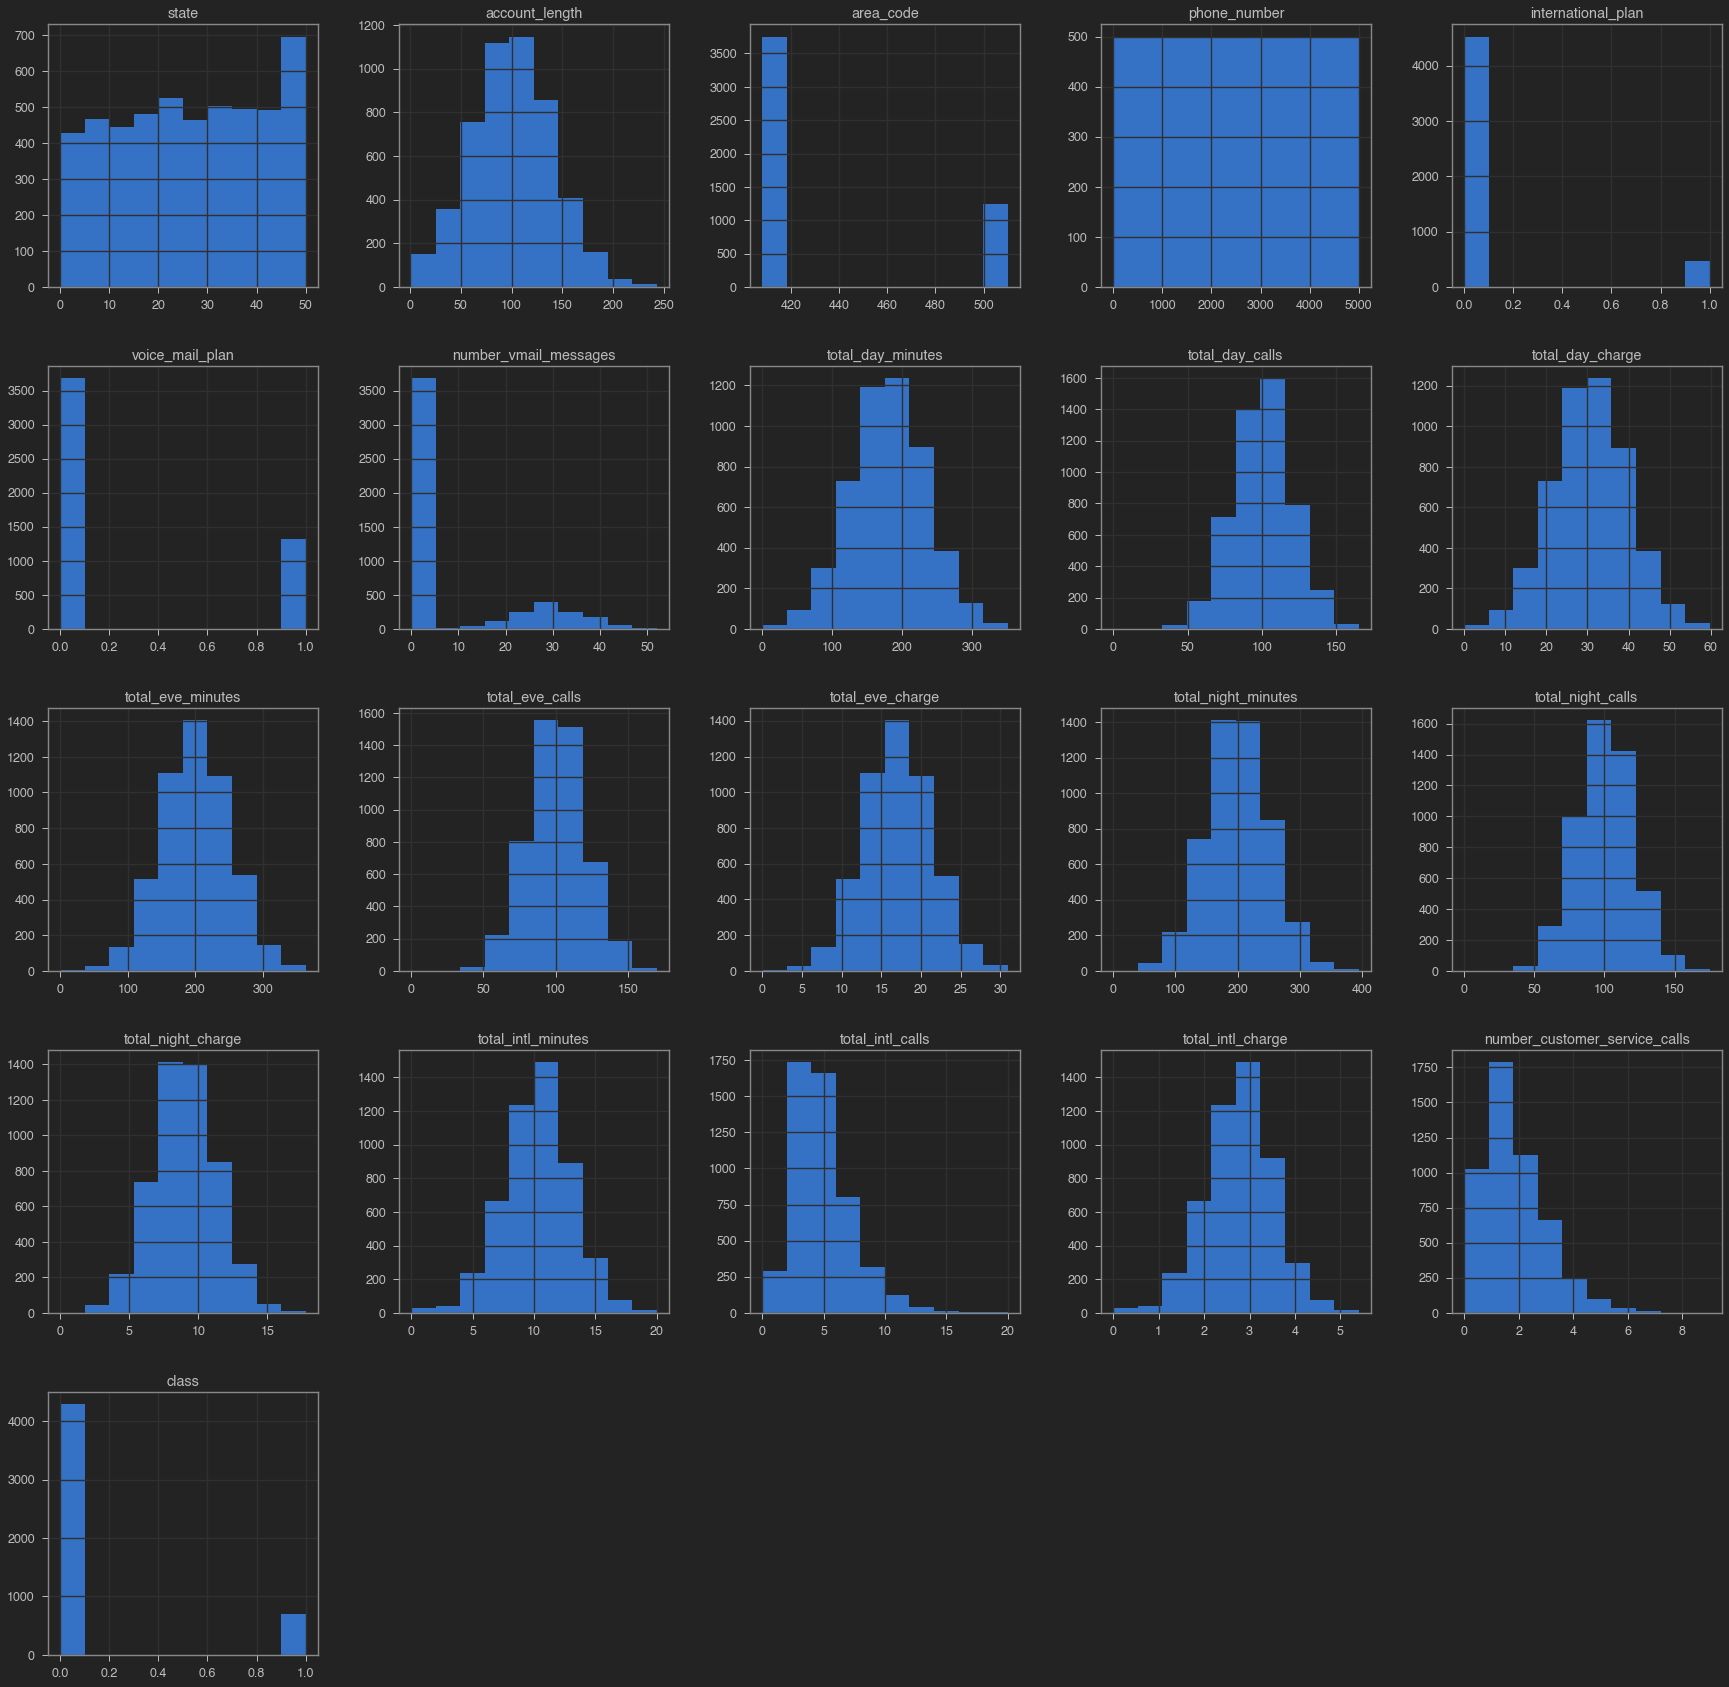

In [11]:
# Task 3: Data Visualisation - getting a quick overview of feature distributions
telecom_df.hist(figsize = (30,30))
plt.show()


In [12]:
# Observation - most features tend to be more normally distributed, icluding total day minutes, total day charge and international minutes. For categorical/dummy variable data such as whether customers have subscribed to an international plan or not - a better visualisation is needed, such as a pie plot.. to follow. 
# Importantly, the feature titled 'class' represents the churn data, with 1 indicating the customer churned/left, and 0 being the customer stayed/retained. A better visual of this to follow. This is the output we aim to predict in upcoming machine learning classifier models.

In [13]:
# Viewing a summary of the Churn data, 'Class' column:
telecom_df['class'].value_counts()

0    4293
1     707
Name: class, dtype: int64

In [14]:
# Plotting a pie chart of the number of customers retained vs churned:
import plotly.graph_objects as go
fig = go.Figure(data = [go.Pie(labels=['Retained(0)','Exited(1)'], values = (telecom_df['class'].value_counts()))])
fig.show()

In [15]:
# Plotting a histogram to see how many customers exited, and were subscribed to the international plan?
fig = px.histogram(telecom_df, x ='international_plan', color='class')
fig.show()

In [16]:
# Considering a view of the filtered churn (1) customers and their usage data, would give us an insight of which services the churned customers engaged with.


In [17]:
fig = px.histogram(telecom_df, x ='voice_mail_plan', color='class')
fig.show()

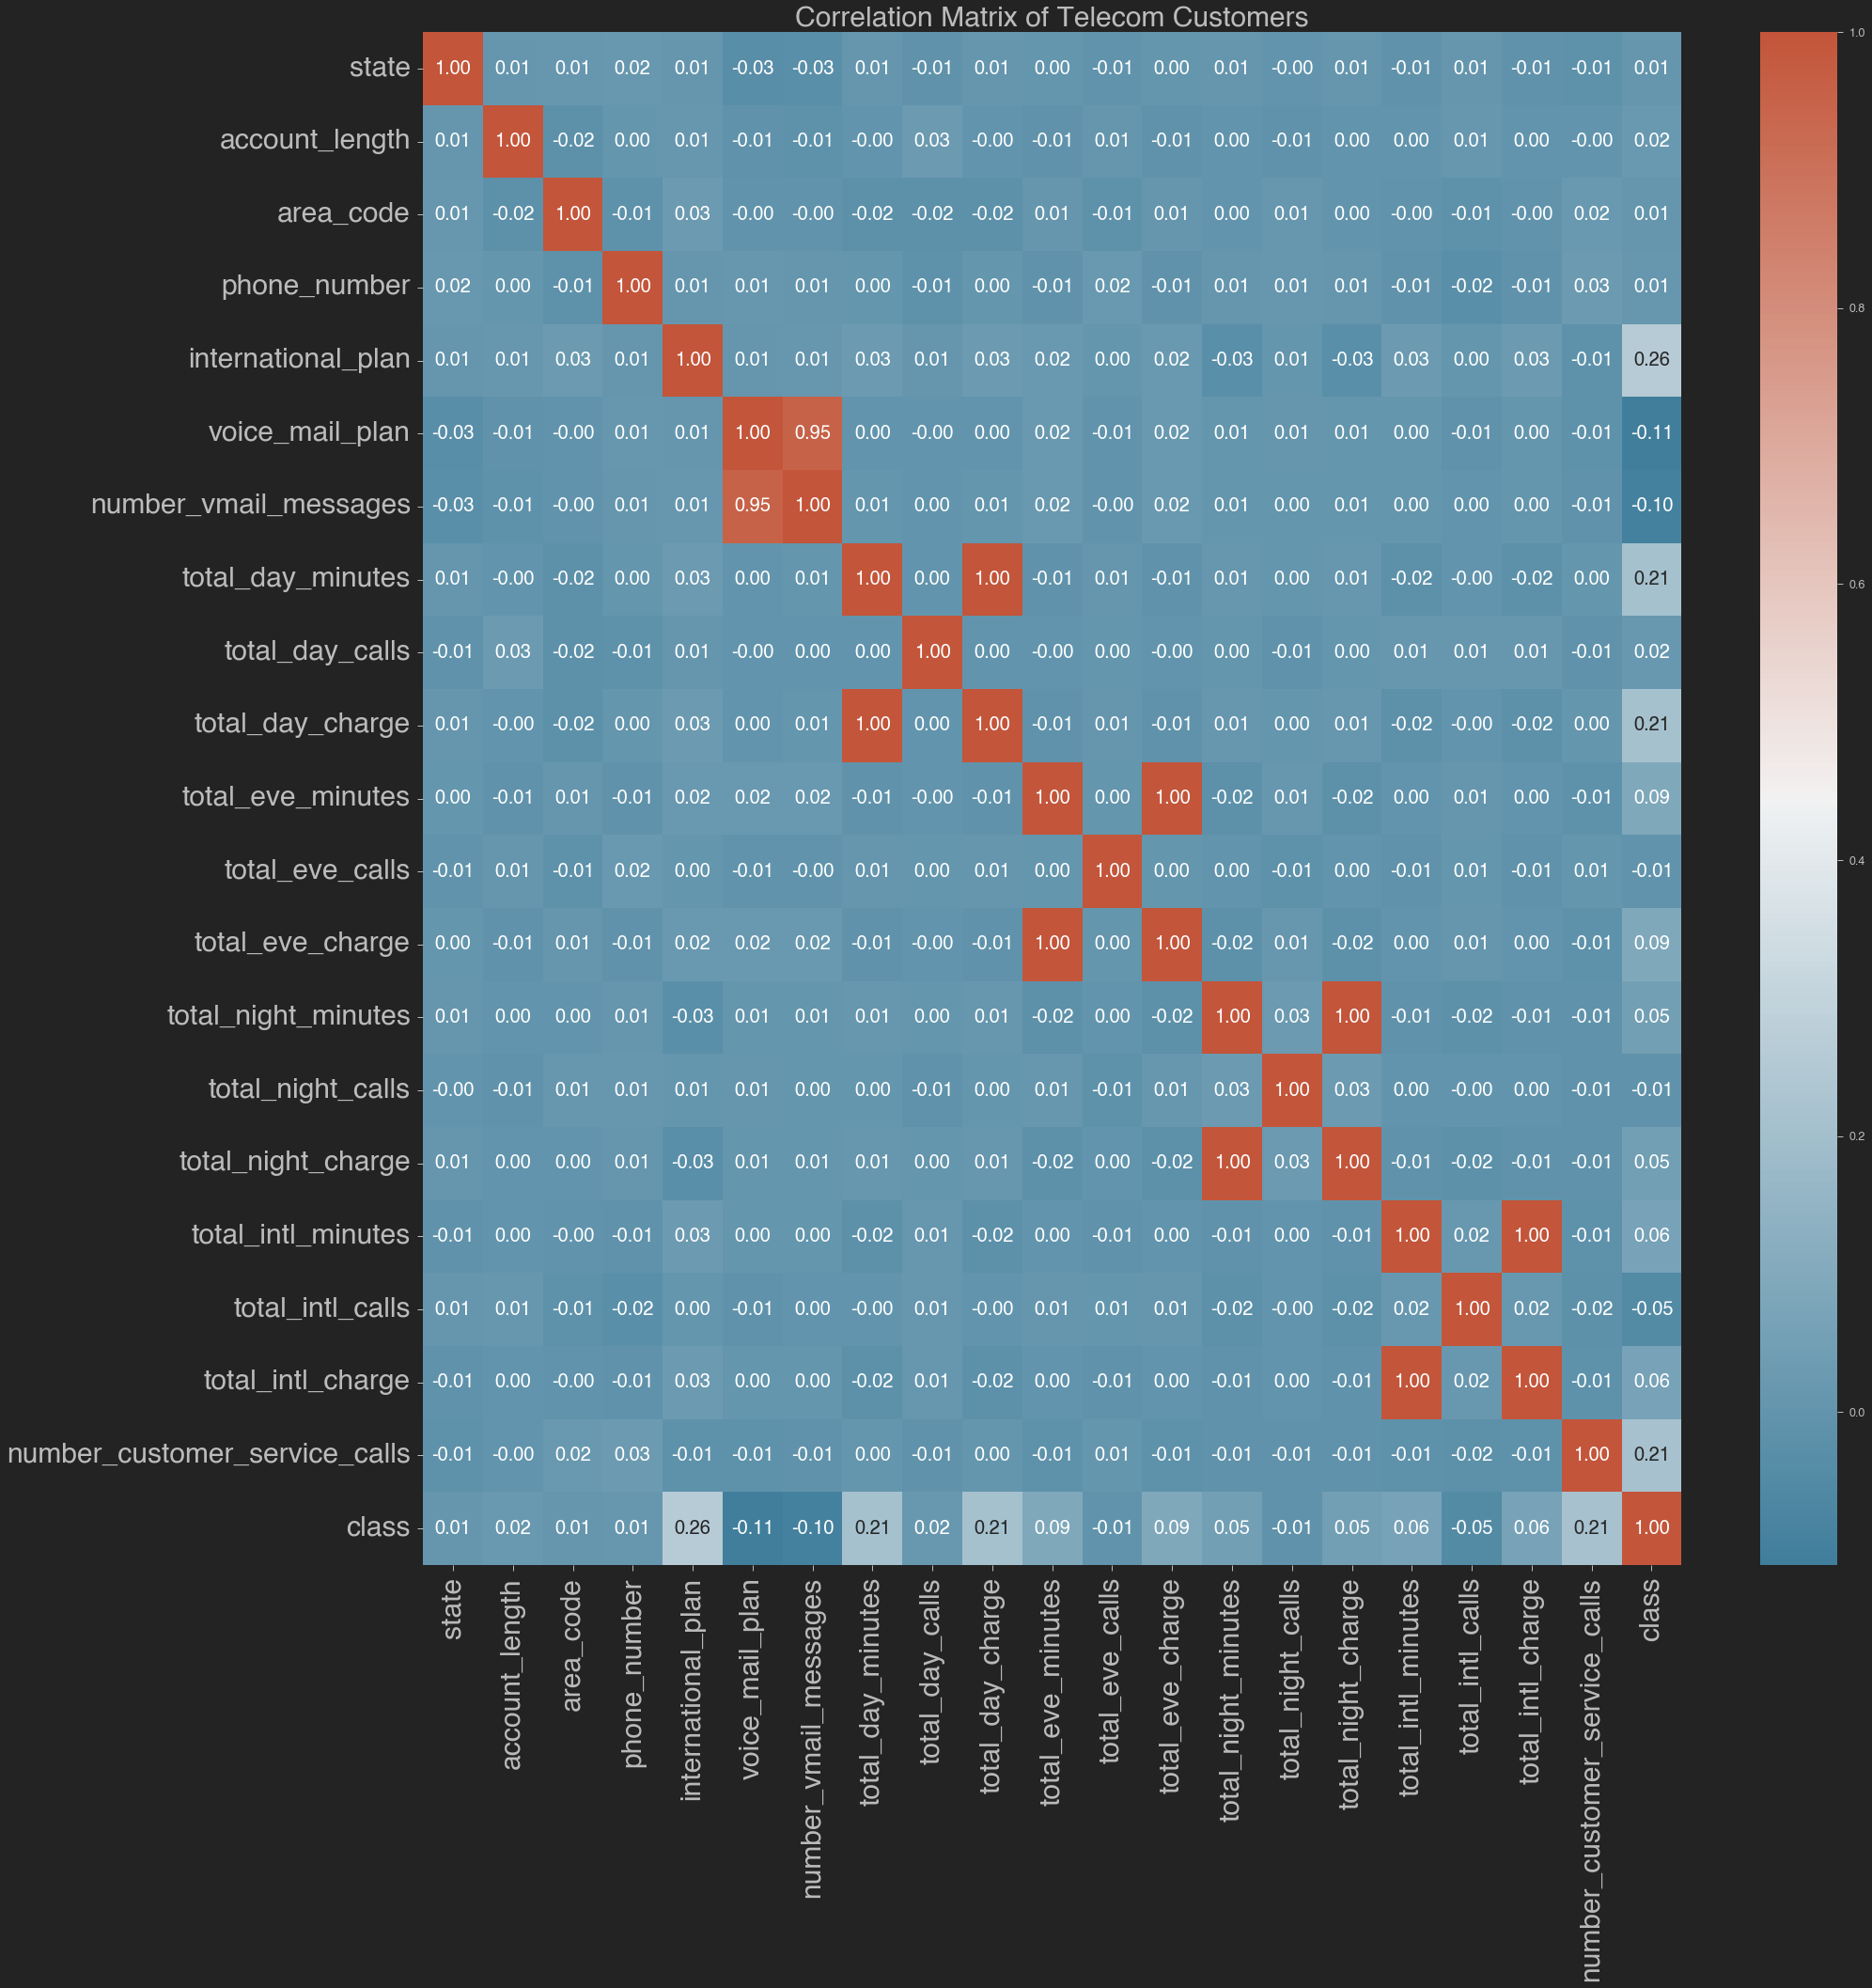

In [18]:
correlation_matrix = telecom_df.corr()
plt.figure(figsize=(30,30))
plt.xticks(fontsize = 30)
plt.yticks(fontsize = 30)
sns.heatmap(correlation_matrix, annot = True, fmt ='0.2f',annot_kws={"size": 20}, cmap = sns.diverging_palette(230, 20, as_cmap=True))
plt.title("Correlation Matrix of Telecom Customers", fontsize = 30)
plt.show()

Text(0.5, 1.0, 'Distribution of day charges by churn')

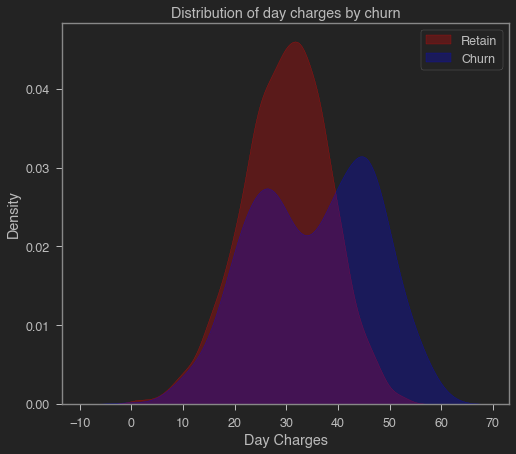

In [19]:
# Analysing Churn by Total Day Charges
chart = sns.kdeplot(telecom_df.total_day_charge[(telecom_df['class']==0)],color = 'Red', shade = True)
chart = sns.kdeplot(telecom_df.total_day_charge[(telecom_df['class']==1)],color = 'Blue', shade = True)
chart.legend(["Retain", "Churn"],loc ='upper right')
chart.set_ylabel("Density")
chart.set_xlabel("Day Charges")
chart.set_title("Distribution of day charges by churn")

In [20]:
# Observation - For the customers that churned, they seemed to have incurred more day charges than those who stayed on with the company.
# We will compare it to the evening charges and churn kde plot.

Text(0.5, 1.0, 'Distribution of evening charges by churn')

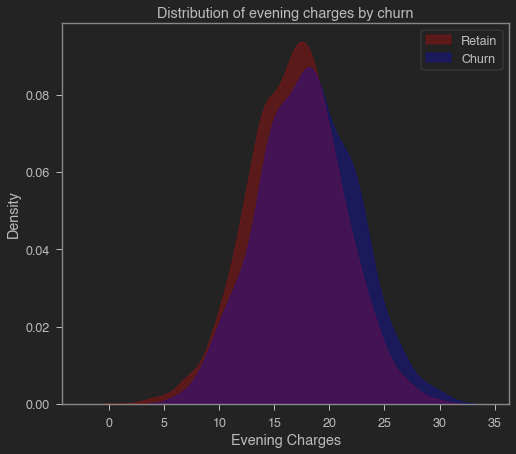

In [21]:
# Analysing Churn by Total Evening Charges
chart = sns.kdeplot(telecom_df.total_eve_charge[(telecom_df['class']==0)],color = 'Red', shade = True)
chart = sns.kdeplot(telecom_df.total_eve_charge[(telecom_df['class']==1)],color = 'Blue', shade = True)
chart.legend(["Retain", "Churn"],loc ='upper right')
chart.set_ylabel("Density")
chart.set_xlabel("Evening Charges")
chart.set_title("Distribution of evening charges by churn")

In [22]:
# Observation - The evening charges for both customers that stayed and customers that churned are roughly similar, 
# with no significant difference. This is in contrast to the previous chart, which emphasizes its disparity in the 
# amount of charges the customers that churned incurred compared to those who stayed on.


In [23]:
# Task 4 - Identify important features and prepare the data for model training

In [24]:
# Removing unecessary features such as area code, phone numbers etc is needed to ensure more accurate modeling, interpretability, and generalization.
# It is therefore crucial to find and select key features in the dataset.
# Next, is to assign our inputs as X, and our output as y, being Churn.

X = telecom_df.drop(['class','area_code','phone_number'],axis = 'columns')
y = telecom_df['class']

In [25]:
# checking the data subsets in X and y
X

,state,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,16,128,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,35,107,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,31,137,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
3,35,84,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
4,36,75,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,11,50,0,1,40,235.7,127,40.07,223.0,126,18.96,297.5,116,13.39,9.9,5,2.67,2
4996,49,152,0,0,0,184.2,90,31.31,256.8,73,21.83,213.6,113,9.61,14.7,2,3.97,3
4997,7,61,0,0,0,140.6,89,23.90,172.8,128,14.69,212.4,97,9.56,13.6,4,3.67,1
4998,7,109,0,0,0,188.8,67,32.10,171.7,92,14.59,224.4,89,10.10,8.5,6,2.30,0


In [26]:
y

0       0
1       0
2       0
3       0
4       0
       ..
4995    0
4996    1
4997    0
4998    0
4999    0
Name: class, Length: 5000, dtype: int64

In [27]:
X.shape

(5000, 18)

In [28]:
y.shape

(5000,)

In [29]:
# Split dataset into train/test portions - we use an 80/20 split.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [30]:
#To verify split:
X_train.shape

(4000, 18)

In [31]:
X_test.shape

(1000, 18)

In [32]:
y_train.shape

(4000,)

In [33]:
y_test.shape

(1000,)

In [34]:
# Getting an indication of the most important feature in the dataset by using the RandomForestClassifier model.
from sklearn.ensemble import RandomForestClassifier
# instantiating an object, rf:
rf = RandomForestClassifier()
rf.fit(X_train, y_train.values.ravel())

RandomForestClassifier()

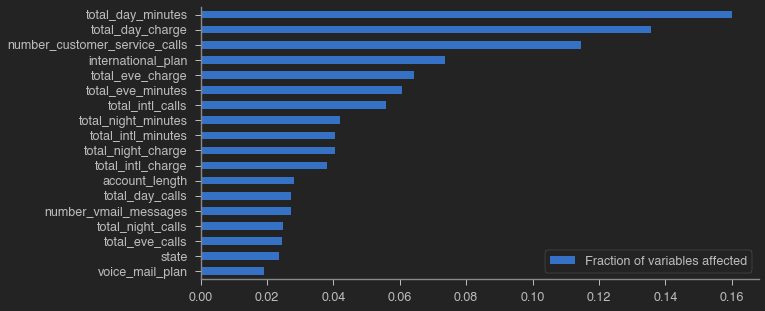

In [35]:
# To plot the feature importance, we need a separate dataframe:
feat_scores = pd.DataFrame({'Fraction of variables affected' :rf.feature_importances_}, index = X.columns)
feat_scores = feat_scores.sort_values(by = 'Fraction of variables affected')
feat_scores.plot(kind = 'barh', figsize = (10, 5))
sns.despine()

In [36]:
#Observation: The RandomForestClassifier identified the most important features relating to churn as total day minutes, total day charge
# numer of customer service calls, and international plan as the top most relevant features. This is highly valuable information
#as it can help the company focus its efforts to address customer churn, by for instance providing more day minutes or reducing the day charge; the number of customer service calls being a key feature
# indicates room for further enquiry as to customer complaints. These focus areas are useful to direct efforts and funding initiatives for adspend, marketing etc.

In [37]:
# Task 5: Train and Evaluate a Logistic Regression Classifier Model
# import relevant modules:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
# instantiate an object for this classifier
model_LR = LogisticRegression()
# train the model using the .fit() method
model_LR.fit(X_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [38]:
#this feedback is a msg the model failed to converge - According to research this means that the model did not fit the data well.
#so we evaluate how it performed:

y_predict = model_LR.predict(X_test)

print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.88      0.99      0.93       874
           1       0.50      0.10      0.17       126

    accuracy                           0.87      1000
   macro avg       0.69      0.54      0.55      1000
weighted avg       0.84      0.87      0.84      1000



In [39]:
# Observation: The LogisticRegression model had an accuracy of 82% (weighted avg), with 87% accuracy in predicting class 0, but a very low 45% accuracy in predicting class 1. 
# this is seen in the low precision rate for predicting the churn (1) class with a score of 0.45.
# The precision rate is calculated as TP/(TP+FP)
# The recall rate of 0.04 is also very low. Considering the recall rate is a measure of how our model is 
#able to correctly identify true positives, our model is only doing this 4% of the time, this is a poor performance on this metric.
# Recall rate is calculated as TP/(TP+FN)
# The F1-score is the harmonic mean between Precision and Recall where the F1 score reaches its best at 1, and 0 at its worst.
# Thus, the F1-score for the LR model ability to predict class 1 is very low at 7%. 

In [40]:
# Reviewing the confusion_matrix for the LogisticRegression Classifier model performance:
cm = confusion_matrix(y_test, y_predict)
print(cm)

[[861  13]
 [113  13]]


[Text(43.0, 0.5, 'True label'), Text(0.5, 34.0, 'Predicted label')]

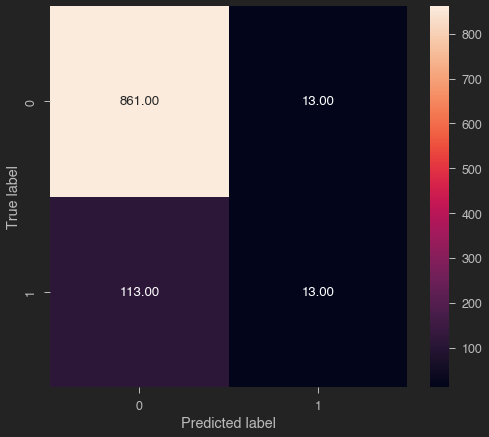

In [41]:
# Plotting a heatmap for the confusion matrix:
ax = sns.heatmap(cm, annot = True, fmt = '0.2f')
ax.set(ylabel='True label', xlabel='Predicted label')


In [42]:
# Observation from the confusion matrix heatmap: The LR model correctly predicted class 1 for only 5 observations, 
# and correctly predicted class 0 for 863 observations. (However, keeping in mind it is crucial for the telecom company to know who is about to churn, therefore class 1 is what is the focus here)
# The number of misclassifications are high in the LR model with 6 observations belonging to class 1, but misclassified as class 0.
# The model missclassified 126 observations as class 1, when they belonged to class 0. This means it inaccurately predicted that 126 customers will churn, when they stay.


In [43]:
#Task 6: Train and Evaluate a SVM Classifier Model
# SVM draw lines (vectors) to separate classes of observations into groups. The boundary that separates it is the focus here
# because SVM tries to draw a maximum margin hyperplane to distinctly separate the classes along the boundary line to avoid 
#misclassification of observations that are very close to both groups or lie on the line. 

# importing the module and evaluation metrics for the model
from sklearn.calibration import CalibratedClassifierCV
from sklearn.svm import LinearSVC

model_SVM = LinearSVC(max_iter = 10000)
model_SVM = CalibratedClassifierCV(model_SVM)
model_SVM.fit(X_train, y_train)



/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



CalibratedClassifierCV(base_estimator=LinearSVC(max_iter=10000))

In [44]:
# Perform predictions using SVM Classifier:
y_predict = model_SVM.predict(X_test)


In [45]:
# Print classification report:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.89      0.98      0.93       874
           1       0.57      0.17      0.26       126

    accuracy                           0.88      1000
   macro avg       0.73      0.57      0.60      1000
weighted avg       0.85      0.88      0.85      1000



[[858  16]
 [105  21]]


[Text(43.0, 0.5, 'True label'), Text(0.5, 34.0, 'Predicted label')]

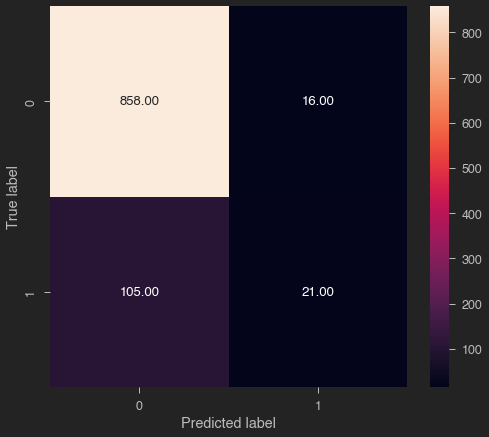

In [46]:
# Plotting a heatmap for the confusion matrix, SVM Classifier Model:
cm = confusion_matrix(y_test, y_predict)
print(cm)
ax = sns.heatmap(cm, annot = True, fmt = '0.2f')
ax.set(ylabel='True label', xlabel='Predicted label')

  

In [47]:
# Observation of the SVM Classifier Performance: A similar evaluation for the SVM model, with a low recall rate,
# and a 50% precision rate on class 1 predictions. The recall rate, ie the ability of the model to correctly identify and predict true positives, being class 1's,
# is the metric of interest because it allows the company to try to save the customers from churning. 


In [48]:
# Task 7 - Train and Evaluate a RandomForestClassifier Model

from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier()
model_rf.fit(X_train, y_train)

RandomForestClassifier()

In [49]:
# Perform predictions using RandomForestClassifier:

y_predict = model_rf.predict(X_test)

In [50]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       874
           1       0.94      0.79      0.86       126

    accuracy                           0.97      1000
   macro avg       0.96      0.89      0.92      1000
weighted avg       0.97      0.97      0.97      1000



In [51]:
# Observation from RF report: High accuracy rate of 96%, particularly with class 1 predictions (97%), and a high recall rate of 72%% with class 1 predictions, and 100% recall on class0 predictions.
# The RF model has the best precision, recall and F1 scores thus far.


[[868   6]
 [ 26 100]]


[Text(43.0, 0.5, 'True label'), Text(0.5, 34.0, 'Predicted label')]

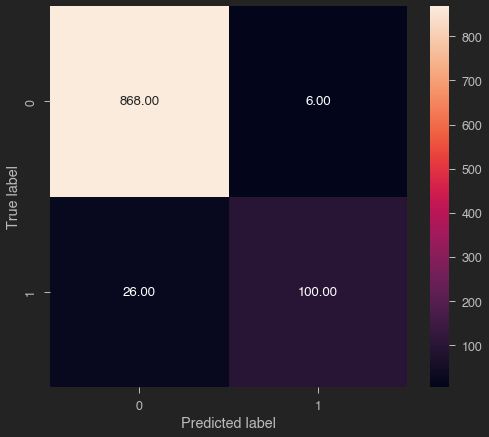

In [52]:
# Plotting a heatmap for the confusion matrix, RandomForest Classifier Model:
cm = confusion_matrix(y_test, y_predict)
print(cm)
ax = sns.heatmap(cm, annot = True, fmt = '0.2f')
ax.set(ylabel='True label', xlabel='Predicted label')

In [53]:
# Observation - High number of correct predictions of churn, being 106 observations as class1, and 849 as class0, with a much lower missclassification number of 42 + 3 obsesrvations compared to previous models. 
# The RF model has the best evaluation metrics compared to prior models, and is indicative of better performance in predicting churn.

In [54]:
#Task 8: Train and Evaluate a KNN Classifier Model:
from sklearn.neighbors import KNeighborsClassifier
model_knn = KNeighborsClassifier()
model_knn.fit(X_train, y_train)

KNeighborsClassifier()

In [55]:
# Perform predictions on test data
y_predict = model_knn.predict(X_test)

In [56]:
# print classification report for knn
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94       874
           1       0.67      0.23      0.34       126

    accuracy                           0.89      1000
   macro avg       0.79      0.61      0.64      1000
weighted avg       0.87      0.89      0.86      1000



In [57]:
# Observation: High prediction accuracy of 87%, with 76% precision rate on class1 predictions, however 26% recall is still weak for class1 predictions. 
# The F1 score for class 1 predictions is 38%, a relatively low percentage.

[[860  14]
 [ 97  29]]


[Text(43.0, 0.5, 'True label'), Text(0.5, 34.0, 'Predicted label')]

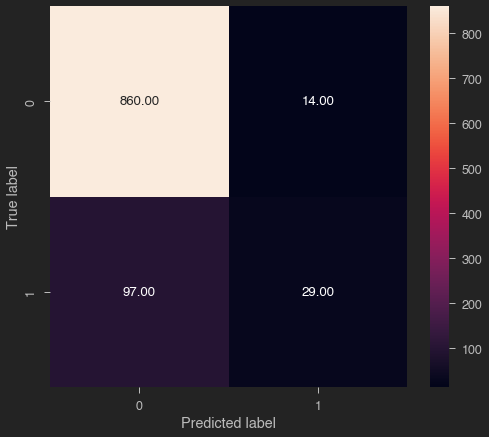

In [58]:
# Plotting a heatmap for the confusion matrix, KNN Classifier Model:
cm = confusion_matrix(y_test, y_predict)
print(cm)
ax = sns.heatmap(cm, annot = True, fmt = '0.2f')
ax.set(ylabel='True label', xlabel='Predicted label')

In [59]:
# Observation: The KNN model correctly identified 38 observations as class1, and 840 correct class0's. It still however had large misclassification errors with 110 + 12 observations being misclassified.
# Thus, the model is weaker than the RF model for churn predictions which saw the lowest levels of misclassifications thus far, and highest correct identifications and predictions.

In [60]:
# Task 9: Train and Evaluate a Naive Bayes Classifier Model
from sklearn.naive_bayes import GaussianNB
model_gnb = GaussianNB()
model_gnb.fit(X_train, y_train)

GaussianNB()

In [61]:
#Perform predictions using the Naive Bayes Classifier:
y_predict = model_gnb.predict(X_test)

In [62]:
#view classification report
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.93      0.94      0.94       874
           1       0.55      0.55      0.55       126

    accuracy                           0.89      1000
   macro avg       0.74      0.74      0.74      1000
weighted avg       0.89      0.89      0.89      1000



In [63]:
# Observation: 86% weighted avg in accuracy, with a lower 56% precision in class 1 predictions, and only 47% recall rate.
# The model performs better than most of our prior models, however the RF model is still ahead in terms of performance.

[[818  56]
 [ 57  69]]


[Text(43.0, 0.5, 'True label'), Text(0.5, 34.0, 'Predicted label')]

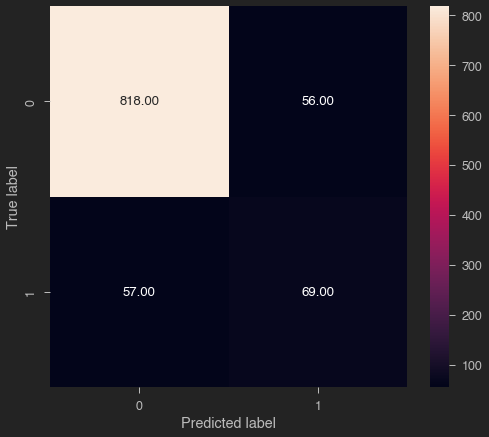

In [64]:
# Plotting a heatmap for the confusion matrix, KNN Classifier Model:
cm = confusion_matrix(y_test, y_predict)
print(cm)
ax = sns.heatmap(cm, annot = True, fmt = '0.2f')
ax.set(ylabel='True label', xlabel='Predicted label')

In [65]:
# Observation: the Naive Bayes classifier model had one of the higher number of correct class 1 predictions (70 observations), second to the RF model. There remains higher misclassifications than the RF model as well (78 predicted as 0 when the true label is 1, compared to a lower number of missclasssified cases being 42 in RF)

In [66]:
# Task 10: The Receiver Operating Characteristic Curve (ROC Curve):
# we first need to calculate the probability of each classifier predicting an output as class 1.

model_LR.predict_proba(X_test)


array([[0.90718264, 0.09281736],
       [0.89133757, 0.10866243],
       [0.63898993, 0.36101007],
       ...,
       [0.53370693, 0.46629307],
       [0.9595034 , 0.0404966 ],
       [0.86958156, 0.13041844]])

In [67]:
# The second column is the probability of an observation (output) being 1 (churn), hence we isolate this column:
model_LR.predict_proba(X_test)[:,1]

array([0.09281736, 0.10866243, 0.36101007, 0.15622657, 0.27598553,
       0.05214647, 0.75911377, 0.05738559, 0.27084594, 0.14631741,
       0.07129542, 0.04775793, 0.14011223, 0.05537648, 0.01808261,
       0.10253052, 0.03387888, 0.03349309, 0.0193496 , 0.0775181 ,
       0.03329911, 0.61006388, 0.44533764, 0.12318921, 0.58311835,
       0.20071012, 0.14116378, 0.61290061, 0.14570942, 0.31582186,
       0.19571668, 0.13469746, 0.07253082, 0.48117942, 0.10658263,
       0.26108976, 0.23029037, 0.14766214, 0.08214637, 0.62788474,
       0.35966196, 0.26749319, 0.04588256, 0.06825729, 0.07370162,
       0.05306161, 0.16350097, 0.13033411, 0.3096896 , 0.07339444,
       0.04273202, 0.14654589, 0.12611187, 0.09495724, 0.09456521,
       0.0803975 , 0.02450243, 0.10838303, 0.50369454, 0.09095113,
       0.04195379, 0.36818254, 0.21491858, 0.14113512, 0.15436386,
       0.12900001, 0.32052623, 0.09074016, 0.1058799 , 0.31739832,
       0.02741149, 0.5623216 , 0.02973854, 0.18490528, 0.03625

In [68]:
# We are trying to predict the outcomes we see in y_test:
y_test

3841    1
473     1
871     1
2251    0
788     0
       ..
1427    0
2417    0
349     1
2201    0
1784    1
Name: class, Length: 1000, dtype: int64

In [69]:
#import ROC module
from sklearn.metrics import roc_curve

In [70]:
fpr1, tpr1, thresh1 = roc_curve(y_test, model_LR.predict_proba(X_test)[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, model_SVM.predict_proba(X_test)[:,1], pos_label=1)
fpr3, tpr3, thresh3 = roc_curve(y_test, model_rf.predict_proba(X_test)[:,1], pos_label=1)
fpr4, tpr4, thresh4 = roc_curve(y_test, model_knn.predict_proba(X_test)[:,1], pos_label=1)
fpr5, tpr5, thresh5 = roc_curve(y_test, model_gnb.predict_proba(X_test)[:,1], pos_label=1)

In [71]:
# importing the AUC score
from sklearn.metrics import roc_auc_score

In [72]:
auc_score1 = roc_auc_score(y_test, model_LR.predict_proba(X_test)[:,1])
auc_score2 = roc_auc_score(y_test, model_SVM.predict_proba(X_test)[:,1])
auc_score3 = roc_auc_score(y_test, model_rf.predict_proba(X_test)[:,1])
auc_score4 = roc_auc_score(y_test, model_knn.predict_proba(X_test)[:,1])
auc_score5 = roc_auc_score(y_test, model_gnb.predict_proba(X_test)[:,1])

In [73]:
# Printing scores:
print("Logistic Regression: ", auc_score1)
print("Support Vector Machine: ", auc_score2)
print("Random Forest: ", auc_score3)
print("k-Nearest Neighbors: ", auc_score4)
print("Naive Bayes: ", auc_score5)

Logistic Regression:  0.734826195924594
Support Vector Machine:  0.8381642512077294
Random Forest:  0.936181032290872
k-Nearest Neighbors:  0.6194426283099052
Naive Bayes:  0.862200791834659


In [74]:
#Observation - The Random Forest Classifier had the highest AUC score of 0.9262, indicating greatest area under the ROC curve, representing greater accuracy of the model compared to the others.
# The worst performing model in this case has been the k-Nearest Neighbors model with an AUC score of 0.6440.


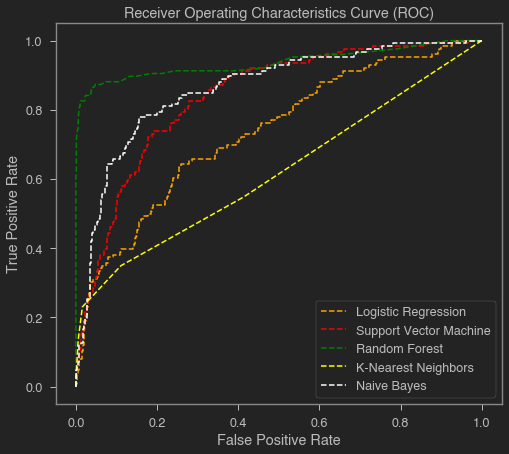

In [75]:
# Plotting the ROC and AUROC curves.
plt.plot(fpr1, tpr1, linestyle = '--', color = "orange", label = 'Logistic Regression')
plt.plot(fpr2, tpr2, linestyle = '--', color = "red", label = 'Support Vector Machine')
plt.plot(fpr3, tpr3, linestyle = '--', color = "green", label = 'Random Forest')
plt.plot(fpr4, tpr4, linestyle = '--', color = "yellow", label = 'K-Nearest Neighbors')
plt.plot(fpr5, tpr5, linestyle = '--', color = "white", label = 'Naive Bayes')

plt.title("Receiver Operating Characteristics Curve (ROC)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

plt.legend(loc = 'best')
plt.savefig('ROC', dpi = 300)
plt.show()

In [76]:
# Observation: From the graph above, it can be noted that the Random Forest Classifier is most 
#skewed to the top left corner, and also has the greatest area under the curve. These signals indicate the 
# RF Model as being the best model at predicting customer churn compared to others in the analysis.


In [77]:
# Conclusion: From our analysis of the telecom churn dataset and with the aim of predicting churn votes (class 1), we have conducted EDA, prepared our data, and 
# trained and evaluated 5 different classifier models namely, Logistic Regression, Support Vector Machines, Random Forest, k-Nearest Neighbors, and Naive Bayes.
# The results have indicated the Random Forest Classifier as the best model with the highest rates of accuracy, precision and recall.
# This was noted in the classification report, and evidenced by lowest FP and FN in the confusion matrix, and highest position and scores in the ROC and AUROC curves:

y_predict = model_rf.predict(X_test)
print(classification_report(y_test, y_predict))


              precision    recall  f1-score   support

           0       0.97      0.99      0.98       874
           1       0.94      0.79      0.86       126

    accuracy                           0.97      1000
   macro avg       0.96      0.89      0.92      1000
weighted avg       0.97      0.97      0.97      1000



In [78]:
# Above recaps the 96% weighted avg accuracy in the rf model. Highest precision, recall and F1 scores 
# across all models indicate in itself a strong ability to make correct predictions with the data; and in 
# comparison to other models explored here, the rf model has achieved highest levels of accuracy and is therefore best. 